# **Solución taller** #5 Óptica Fourier: implementación y criterios para la propagación de la luz

In [ ]:
#Librerías
import numpy as np
import scipy.fft as sft
import matplotlib.pyplot as plt

def ftfresnel(M,N,dx,wl,z): #Propagadores de Fresnel: función transferencia 
    
    """
    Esta funcion genera una funcion de transferencia  de tamaño (n,m) para la transformada de fresnel con distancia z tamaño de píxel dx y longitud de onda wl.
    Usar tamaños cuadrados para evitar artefactos de anisotropia, o generar una funcion cuadrada de mayor tamaño y recortar el tamaño deseado. 
    El programa determina si se genera la funcion de transferencia directamente.
    
    Parameters
    ----------
    M : Integer
        Tamaño de la funcion de transferencia en pixeles en la direccion horizontal
    N : Integer
        Tamaño de la funcion de transferencia en pixeles en la direccion horizontal
    dx : Float
        Tamaño de píxel
    wl : Float
        Longitud de onda
    z : Float
        Distancia de propagacion.

    Returns
    -------
    H
        Arreglo de numpy con tamaño N,M

    """
    Lx=M*dx
    Ly=N*dx
    k=2*np.pi/wl
    x=np.arange(-Lx/2,Lx/2,dx)
    y=np.arange(-Ly/2,Ly/2,dx)
    fx=np.arange(-1/(2*dx),1/(2*dx),1/Lx)
    fy=np.arange(-1/(2*dx),1/(2*dx),1/Ly)
    zmax=(dx*Lx)/wl
    FX,FY=np.meshgrid(fx,fy)
    H=np.exp(-1j*wl*z*np.pi*(FX**2+FY**2))
    H=sft.fftshift(H)
    return H

def irfresnel(M,N,dx,wl,z): #Propagador de Fresnel: función respuesta al impulso. 
    
    """
    Esta funcion genera una funcion de tranfserencia  de tamaño (n,m) para la transformada de fresnel con distancia z tamaño de píxel dx y longitud de onda wl.
    Usar tamaños cuadrados para evitar artefactos de anisotropia, o generar una funcion cuadrada de mayor tamaño y recortar el tamaño deseado. 
    El programa genera la funcion de transferencia por medio de la respuesta al impulso en base a los paramtros introducidos.
    
    Parameters
    ----------
    M : Integer
        Tamaño de la funcion de transferencia en pixeles en la direccion horizontal
    N : Integer
        Tamaño de la funcion de transferencia en pixeles en la direccion horizontal
    dx : Float
        Tamaño de píxel
    wl : Float
        Longitud de onda
    z : Float
        Distancia de propagacion.

    Returns
    -------
    H
        Arreglo de numpy con tamaño N,M

    """
    Lx=M*dx
    Ly=N*dx
    k=2*np.pi/wl
    x=np.arange(-Lx/2,Lx/2,dx)
    y=np.arange(-Ly/2,Ly/2,dx)
    fx=np.arange(-1/(2*dx),1/(2*dx),1/Lx)
    fy=np.arange(-1/(2*dx),1/(2*dx),1/Ly)
    zmax=(dx*Lx)/wl
    X,Y=np.meshgrid(x,y)
    h=(1/(1j*wl*z))*np.exp(1j*k/(2*z)*(X**2+Y**2))
    H=sft.fft2(sft.fftshift(h))*(dx**2)  
    return H

def convft(U,H,dx):
    """
    Realiza la convolucion 2D de las matrices U,H usando la transformada rapida de Fourier. U, H deben tener la misma forma.
    
    Parameters
    ----------
    U : Array Numpy
        Uno de las matrices a convolucionar
    H : Array Numpy
        Otra de las matrices a convolucionar
    dx : Float
        Tamaño de muestreo de las funciones a convolucionar. Necesario para preservar escala.

    Returns
    -------
    U2
        Arreglo de numpy con la convolucio de U y H

    """
    U2=sft.fft2(sft.fftshift(U))*(dx**2)
    U2=H*U2
    U2=sft.ifftshift(sft.ifft2(U2)*(1/dx**2))
    return U2

#Función rect
def rect1D(x): 
  return abs(x)<=(1/2)

def circ2D(x,y,d): # FUNCION circulo EN 2D
        s=np.zeros([len(x),len(y)])
        s[x**2+y**2<d**2]=1.0
        s[x**2+y**2==d**2]=0.5
        return s

## Punto 5.1 

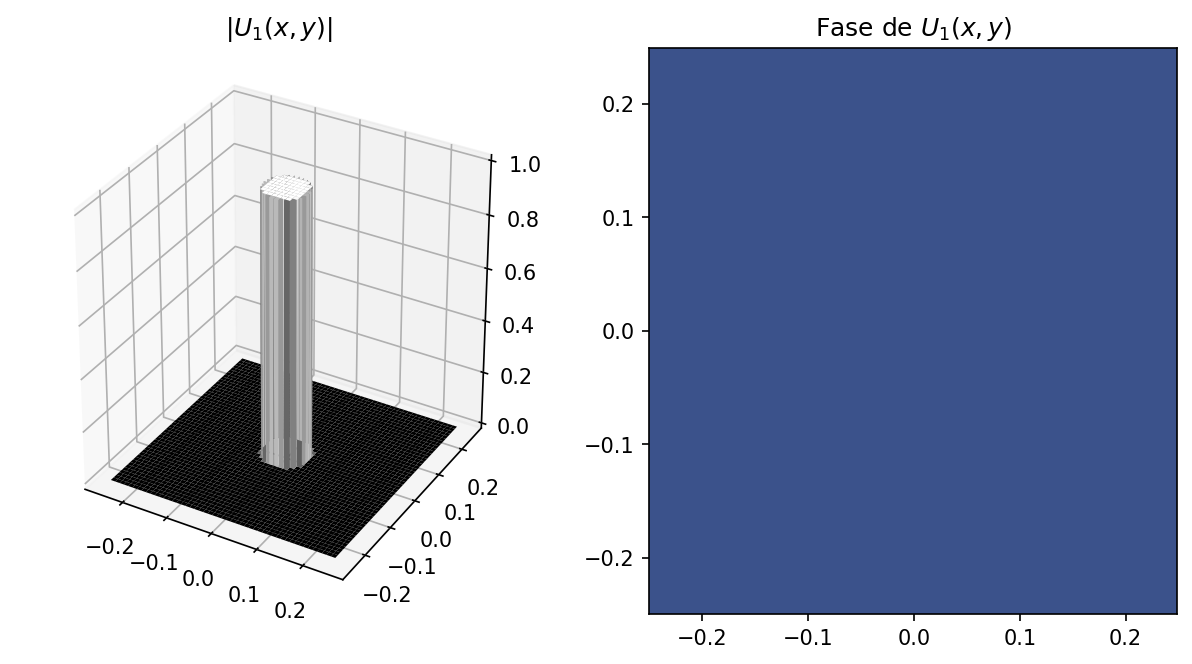

In [ ]:
w = 0.05 
wl = 0.5e-6
M = 500
L = 0.5 
dx = 1e-3 

z1, z2, z3 = 500, 1000, 2000

x1 = np.arange(-L/2, L/2, dx); y1 = x1; 

xx1, yy1 = np.meshgrid(x1, y1)

u1 = circ2D(xx1, yy1, w)

plt.rcParams['figure.figsize'] = 10, 5

fig = plt.figure(dpi=150)
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot_surface(xx1,yy1,np.abs(u1),cmap='gray')
ax.title.set_text('$|U_1(x,y)|$')

ax = fig.add_subplot(1, 2,2)
ax.contourf(xx1,yy1,np.angle(u1))
ax.title.set_text('Fase de $U_1(x,y)$')
plt.show()


<Figure size 1500x750 with 0 Axes>

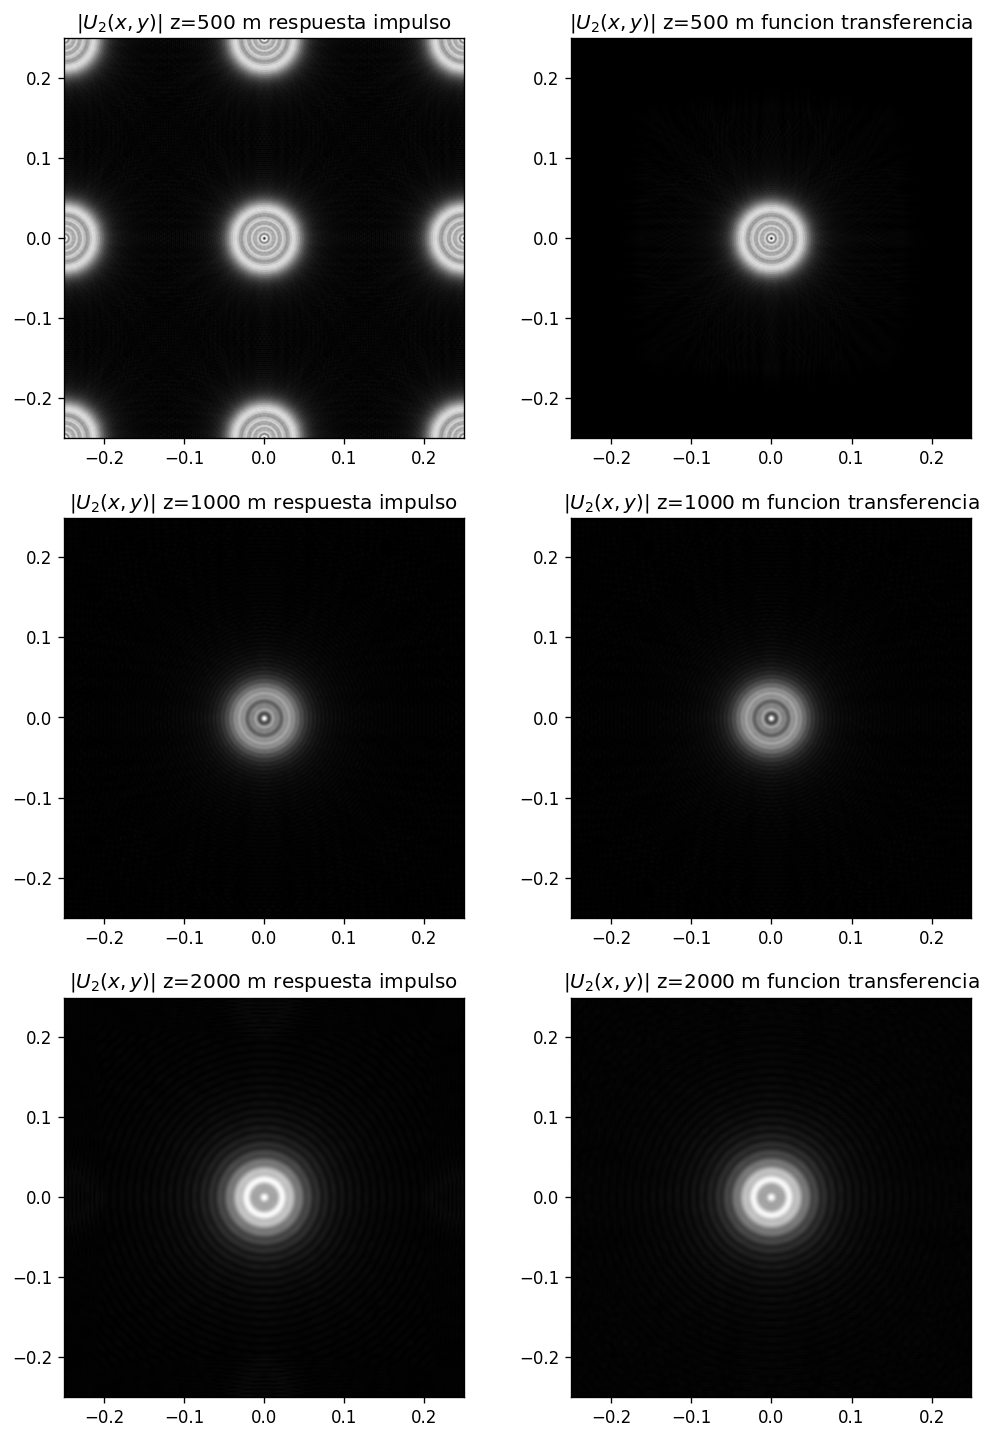

In [ ]:
#Respuesta al impuso y función transferencia propagación z1= 500 [m]
Hirz1=irfresnel(M,M,dx,wl,z1)
Hftz1=ftfresnel(M,M,dx,wl,z1)

#Respuesta al impuso y función transferencia propagación z2= 1000 [m]
Hirz2=irfresnel(M,M,dx,wl,z2)
Hftz2=ftfresnel(M,M,dx,wl,z2)

#Respuesta al impuso y función transferencia propagación z3= 2000 [m]
Hirz3=irfresnel(M,M,dx,wl,z3)
Hftz3=ftfresnel(M,M,dx,wl,z3)

# Convolución con función respuesta al impulso 
u2irz1=convft(u1,Hirz1,dx)
u2irz2=convft(u1,Hirz2,dx)
u2irz3=convft(u1,Hirz3,dx)

#Convolución con función de transferencia
u2ftz1=convft(u1,Hftz1,dx)
u2ftz2=convft(u1,Hftz2,dx)
u2ftz3=convft(u1,Hftz3,dx)

plt.rcParams['figure.figsize'] = 10, 5

fig = plt.figure(dpi=150)


plt.rcParams['figure.figsize'] = 10,15

fig = plt.figure(dpi=120)

ax = fig.add_subplot(3, 2, 1)
ax.imshow(np.abs(u2irz1)**(1), cmap='gray',extent=[np.min(x1),np.max(x1),np.min(y1),np.max(y1)])
ax.title.set_text('$|U_2(x,y)|$ z=500 m respuesta impulso')

ax = fig.add_subplot(3, 2,2)
ax.imshow(np.abs(u2ftz1)**(1), cmap='gray',extent=[np.min(x1),np.max(x1),np.min(y1),np.max(y1)])
ax.title.set_text('$|U_2(x,y)|$ z=500 m funcion transferencia')


ax = fig.add_subplot(3, 2, 3)
ax.imshow(np.abs(u2irz2)**(1), cmap='gray',extent=[np.min(x1),np.max(x1),np.min(y1),np.max(y1)])
ax.title.set_text('$|U_2(x,y)|$ z=1000 m respuesta impulso')
ax = fig.add_subplot(3, 2, 4)
ax.imshow(np.abs(u2ftz2)**(1), cmap='gray',extent=[np.min(x1),np.max(x1),np.min(y1),np.max(y1)])
ax.title.set_text('$|U_2(x,y)|$ z=1000 m funcion transferencia')

ax = fig.add_subplot(3, 2, 5)
ax.imshow(np.abs(u2irz3)**(1), cmap='gray',extent=[np.min(x1),np.max(x1),np.min(y1),np.max(y1)])
ax.title.set_text('$|U_2(x,y)|$ z=2000 m respuesta impulso')
ax = fig.add_subplot(3, 2, 6)
ax.imshow(np.abs(u2ftz3)**(1), cmap='gray',extent=[np.min(x1),np.max(x1),np.min(y1),np.max(y1)])
ax.title.set_text('$|U_2(x,y)|$ z=2000 m funcion transferencia')

plt.show()

**Conclusiones gráficas**: 


---
Recordemos que $zc = 1000 $ m, sobre esto hacemos las siguientes conclusiones de las gráficas

*   *De la primera fila* podemos notar que la función respuesta al impulso muestra réplicas periódicas de la función, lo cual es consistente con la teoría. Ya que, para las distancias cortas el propagador de Frenel correcto es función de transferencia. 
*   *De la segunda fila* podemos notar que ambos propagadores están en $zc$ y por tanto los dos propagadores funcionan bien. Podemos ver que son idénticos desde la gráfica

*  *De la tercera fila* podemos notar que el propagador función de transferencia empieza a verse pixelado, esto es debido a que se empiezan a perder las información de las frecuencias altas. El propagador utilizado para distancias largas es el de respuesta al impulso. 




## Problema 5.3: 

### Solución parte a): 
En este caso vamos a implementar el mismo ejemplo que hace el libro **sqr beam** pero con la adicción del calculo de la potencia óptica que bidimensionalmente es una integral doble de la intensidad, definida como: 
$$P = \int\int I(x,y) dxdy$$

0.010404 := Potencia óptica en el plano de observación


Text(0, 0.5, 'y(m)')

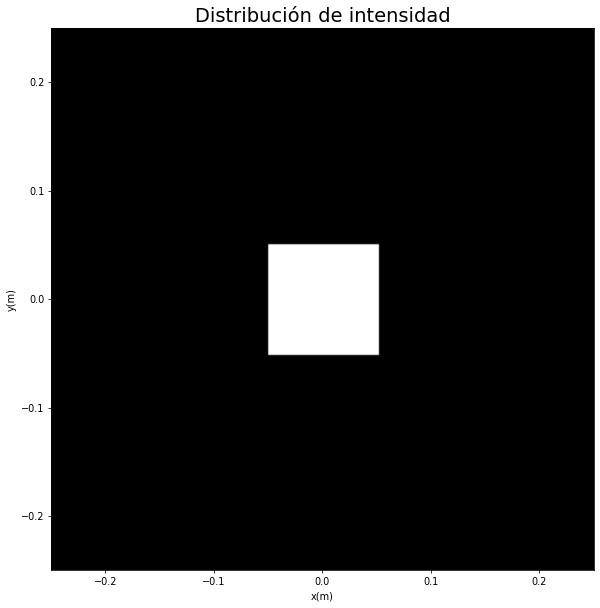

In [ ]:
l1 = 0.5 
M = 250 #Número de muestras en cada eje
dx1 = l1/M #Rata de muestreo 

x1_p = np.arange(-l1/2, l1/2, dx1); y1_p = x1_p;  #Sistema coordenado.

#Paramétros del sistema 
wl = 0.5e-6 #Longitud de onda
k = 2*np.pi/wl #Número de onda
w = 0.051 #Medio ancho de la abertura
z1 = 2000 #Distancia de propagación 

xx, yy = np.meshgrid(x1_p,y1_p) #Generamos el espacio meshgrid


u1_rect= rect1D(xx/(2*w))*rect1D(yy/(2*w))
I1 = (np.abs(u1_rect))**2 #Irradiancia

P_fuente = np.sum(np.sum(I1))*(dx1**2)
print(P_fuente, ':= Potencia óptica en el plano de observación')

plt.figure(dpi=70)
plt.imshow(I1, cmap='gray', extent=[-l1/2,l1/2,-l1/2,l1/2])
plt.title('Distribución de intensidad', fontsize=20)
plt.xlabel('x(m)')
plt.ylabel('y(m)')

Ahora propaguemos el campo por función respuesta al impulso y por función transferencia, para así analizar la potencia óptica en estos campos después de obtener el resultado. 

In [ ]:
#Función respuesta al impulso y función transferencia. 
Hirz1=irfresnel(M,M,dx,wl,z1)
Hftz1=ftfresnel(M,M,dx,wl,z1)

# Convolución con función respuesta al impulso 
u2irz1=convft(u1_rect,Hirz1,dx1)
#Convolución con función de transferencia
u2ftz1=convft(u1_rect,Hftz1,dx1)

#Hallemos la potencia óptica en cada caso

P_IR = sum(sum(u2irz1))*(dx1**2)
P_FT = sum(sum(u2ftz1))*(dx1**2)

print(P_IR, ':=Potencia óptica plano de observación debido a la propagación función respuesta al impulso')
print(P_FT,':= Potencia óptica plano de observación debido a la propagación función transferencia')

(0.00898527153326469+0.0005796744302118556j) :=Potencia óptica plano de observación debido a la propagación función respuesta al impulso
(0.010403999999999997+4.227729277772596e-19j) := Potencia óptica plano de observación debido a la propagación función transferencia


In [ ]:
z = np.arange(500,5000,100)
PIR = []
PFT = []

for i in np.arange(0,len(z)):
  Hirz1=irfresnel(M,M,dx,wl,z[i])
  Hftz1=ftfresnel(M,M,dx,wl,z[i])
  u2irz1=convft(u1_rect,Hirz1,dx1)
  u2ftz1=convft(u1_rect,Hftz1,dx1)
  P_IR = sum(sum(u2irz1))*(dx1**2)
  P_FT = sum(sum(u2ftz1))*(dx1**2)
  PIR.append(P_IR.real)
  PFT.append(P_FT.real)

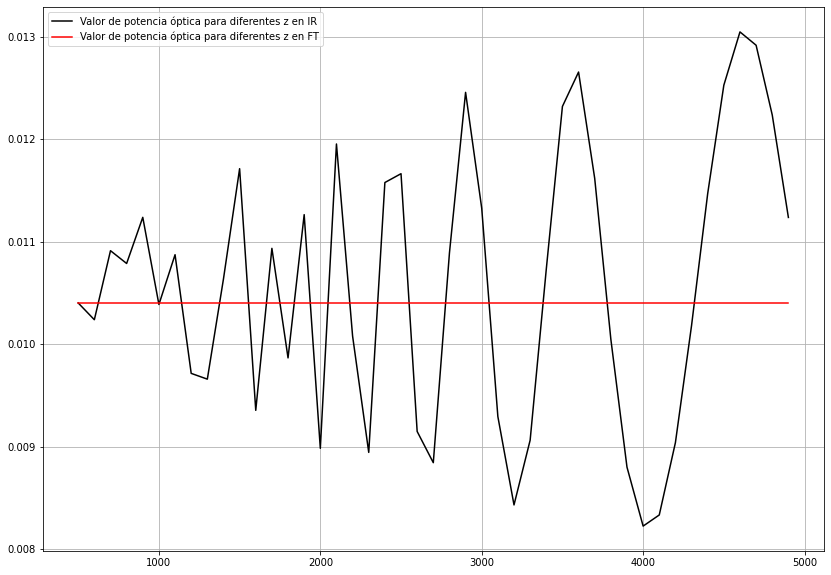

In [ ]:
potencia_IR = np.array(PIR)
potencia_FT = np.array(PFT)

plt.figure(figsize=(14,10))
plt.plot(z, potencia_IR,color='black', label='Valor de potencia óptica para diferentes z en IR')
plt.plot(z, potencia_FT,color='red', label='Valor de potencia óptica para diferentes z en FT')
plt.grid()
plt.legend()

Podemos ver que las discrepancias se dan en el propagdor de respuesta al impulso. Lo curioso es que podemos notar que este valor se da para todos los valores de IR tanto distancias cortas como distancias largas. ¿? 

## Solución problema 5.5: 

5.9999999999999995e-05


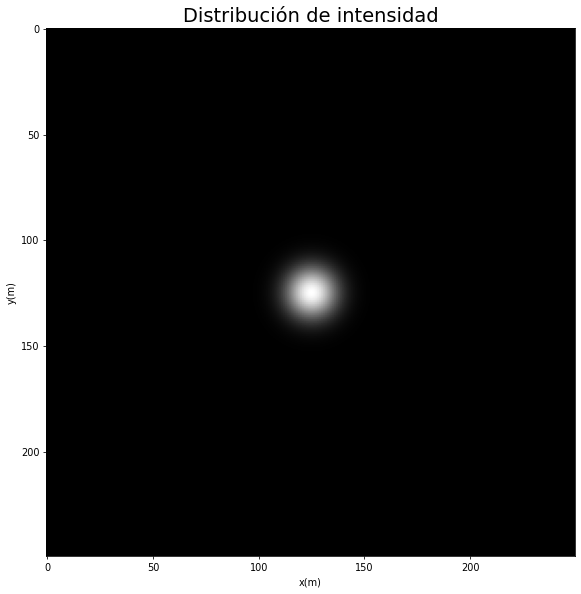

In [ ]:
# Datos del problema: 
wo = 1e-3 #Radio del haz de la fuente
wl = 0.633e-6 
Ao = 1.
z1, z2, z3 = 1., 5., 10. 
#*******
L = 15e-3 #Longitud
M = 250 #Muestras
dx = L/M 

#Sistemas coord. 
xg = np.arange(-L/2, L/2, dx); yg = xg; 
#Espacio meshgrid 
xxg, yyg = np.meshgrid(xg,yg) 

ug1 = Ao * np.exp(- (xxg**2 + yyg**2)/(wo**2)) #Campo óptica de entrada

Ig1 = np.abs(ug1)**2 
plt.figure(dpi=70)
plt.imshow(Ig1, cmap='gray')
plt.title('Distribución de intensidad', fontsize=20)
plt.xlabel('x(m)')
plt.ylabel('y(m)')
print(dx)

Realicemos la simulación tanto para el propagador de Fresnel función transferencia como para el propagador respuesta al impulso. 

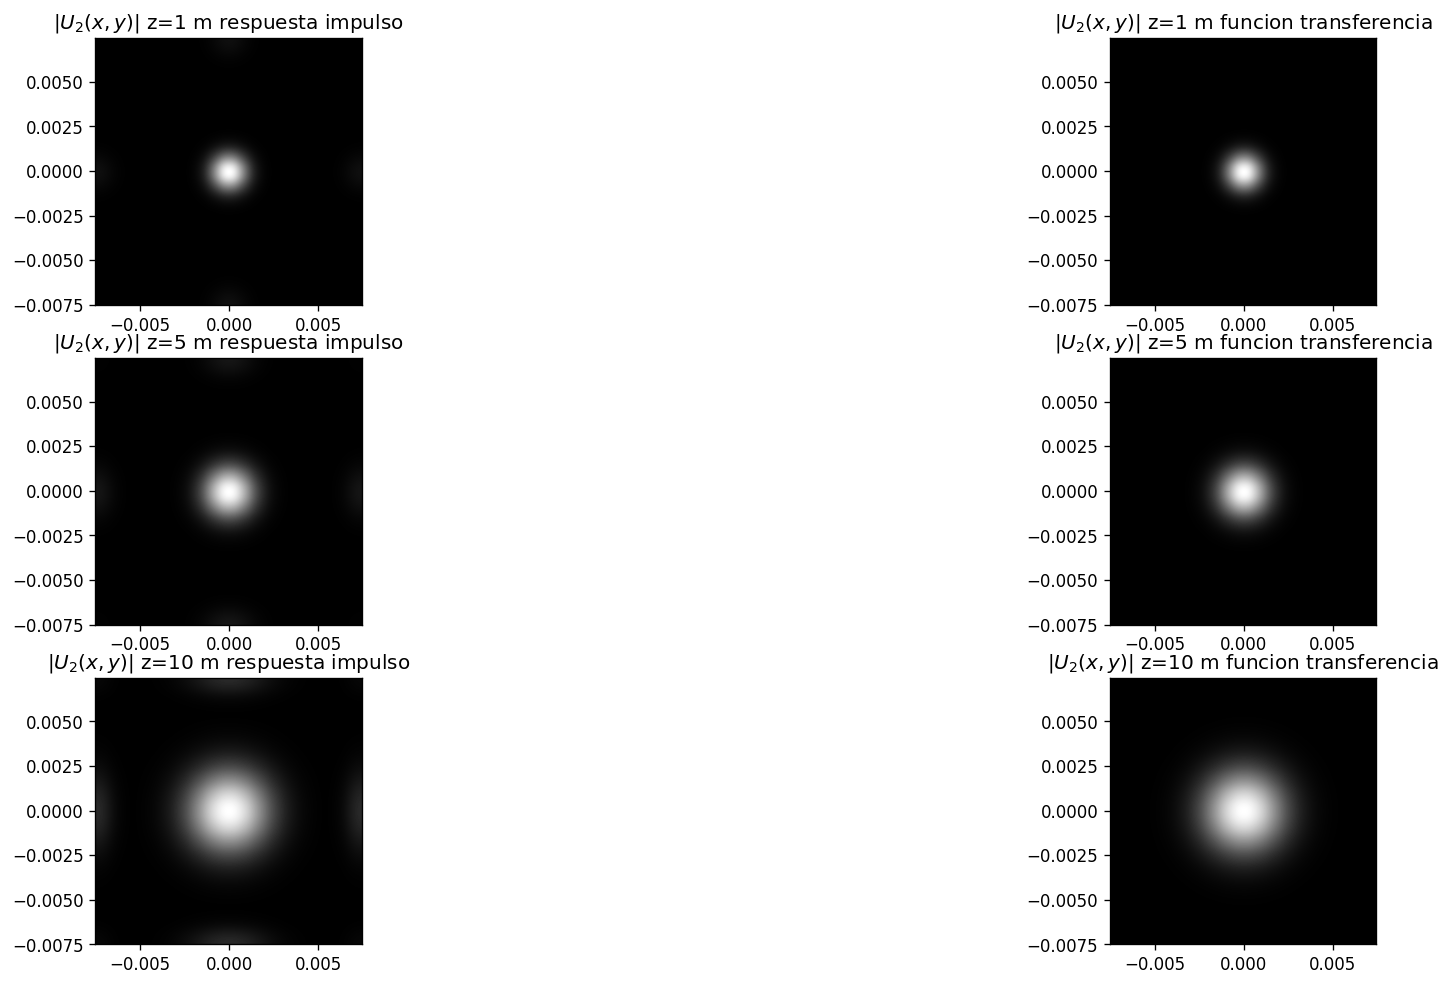

In [ ]:
#Función respuesta al impulso y función transferencia. 
Hirz1=irfresnel(M,M,dx,wl,z1)
Hftz1=ftfresnel(M,M,dx,wl,z1)
Hirz2=irfresnel(M,M,dx,wl,z2)
Hftz2=ftfresnel(M,M,dx,wl,z2)
Hirz3=irfresnel(M,M,dx,wl,z3)
Hftz3=ftfresnel(M,M,dx,wl,z3)

# Convolución con función respuesta al impulso 
u2irz1=convft(ug1,Hirz1,dx)
u2irz2=convft(ug1,Hirz2,dx)
u2irz3=convft(ug1,Hirz3,dx)


#Convolución con función de transferencia
u2ftz1=convft(ug1,Hftz1,dx)
u2ftz2=convft(ug1,Hftz2,dx)
u2ftz3=convft(ug1,Hftz3,dx)

fig = plt.figure(dpi=120)

ax = fig.add_subplot(3, 2, 1)
ax.imshow(np.abs(u2irz1)**(1), cmap='gray',extent=[np.min(xg),np.max(xg),np.min(yg),np.max(yg)])
ax.title.set_text('$|U_2(x,y)|$ z=1 m respuesta impulso')

ax = fig.add_subplot(3, 2,2)
ax.imshow(np.abs(u2ftz1)**(1), cmap='gray',extent=[np.min(xg),np.max(xg),np.min(yg),np.max(yg)])
ax.title.set_text('$|U_2(x,y)|$ z=1 m funcion transferencia')


ax = fig.add_subplot(3, 2, 3)
ax.imshow(np.abs(u2irz2)**(1), cmap='gray',extent=[np.min(xg),np.max(xg),np.min(yg),np.max(yg)])
ax.title.set_text('$|U_2(x,y)|$ z=5 m respuesta impulso')
ax = fig.add_subplot(3, 2, 4)
ax.imshow(np.abs(u2ftz2)**(1), cmap='gray',extent=[np.min(xg),np.max(xg),np.min(yg),np.max(yg)])
ax.title.set_text('$|U_2(x,y)|$ z=5 m funcion transferencia')

ax = fig.add_subplot(3, 2, 5)
ax.imshow(np.abs(u2irz3)**(1), cmap='gray',extent=[np.min(xg),np.max(xg),np.min(yg),np.max(yg)])
ax.title.set_text('$|U_2(x,y)|$ z=10 m respuesta impulso')
ax = fig.add_subplot(3, 2, 6)
ax.imshow(np.abs(u2ftz3)**(1), cmap='gray',extent=[np.min(xg),np.max(xg),np.min(yg),np.max(yg)])
ax.title.set_text('$|U_2(x,y)|$ z=10 m funcion transferencia')

plt.show()



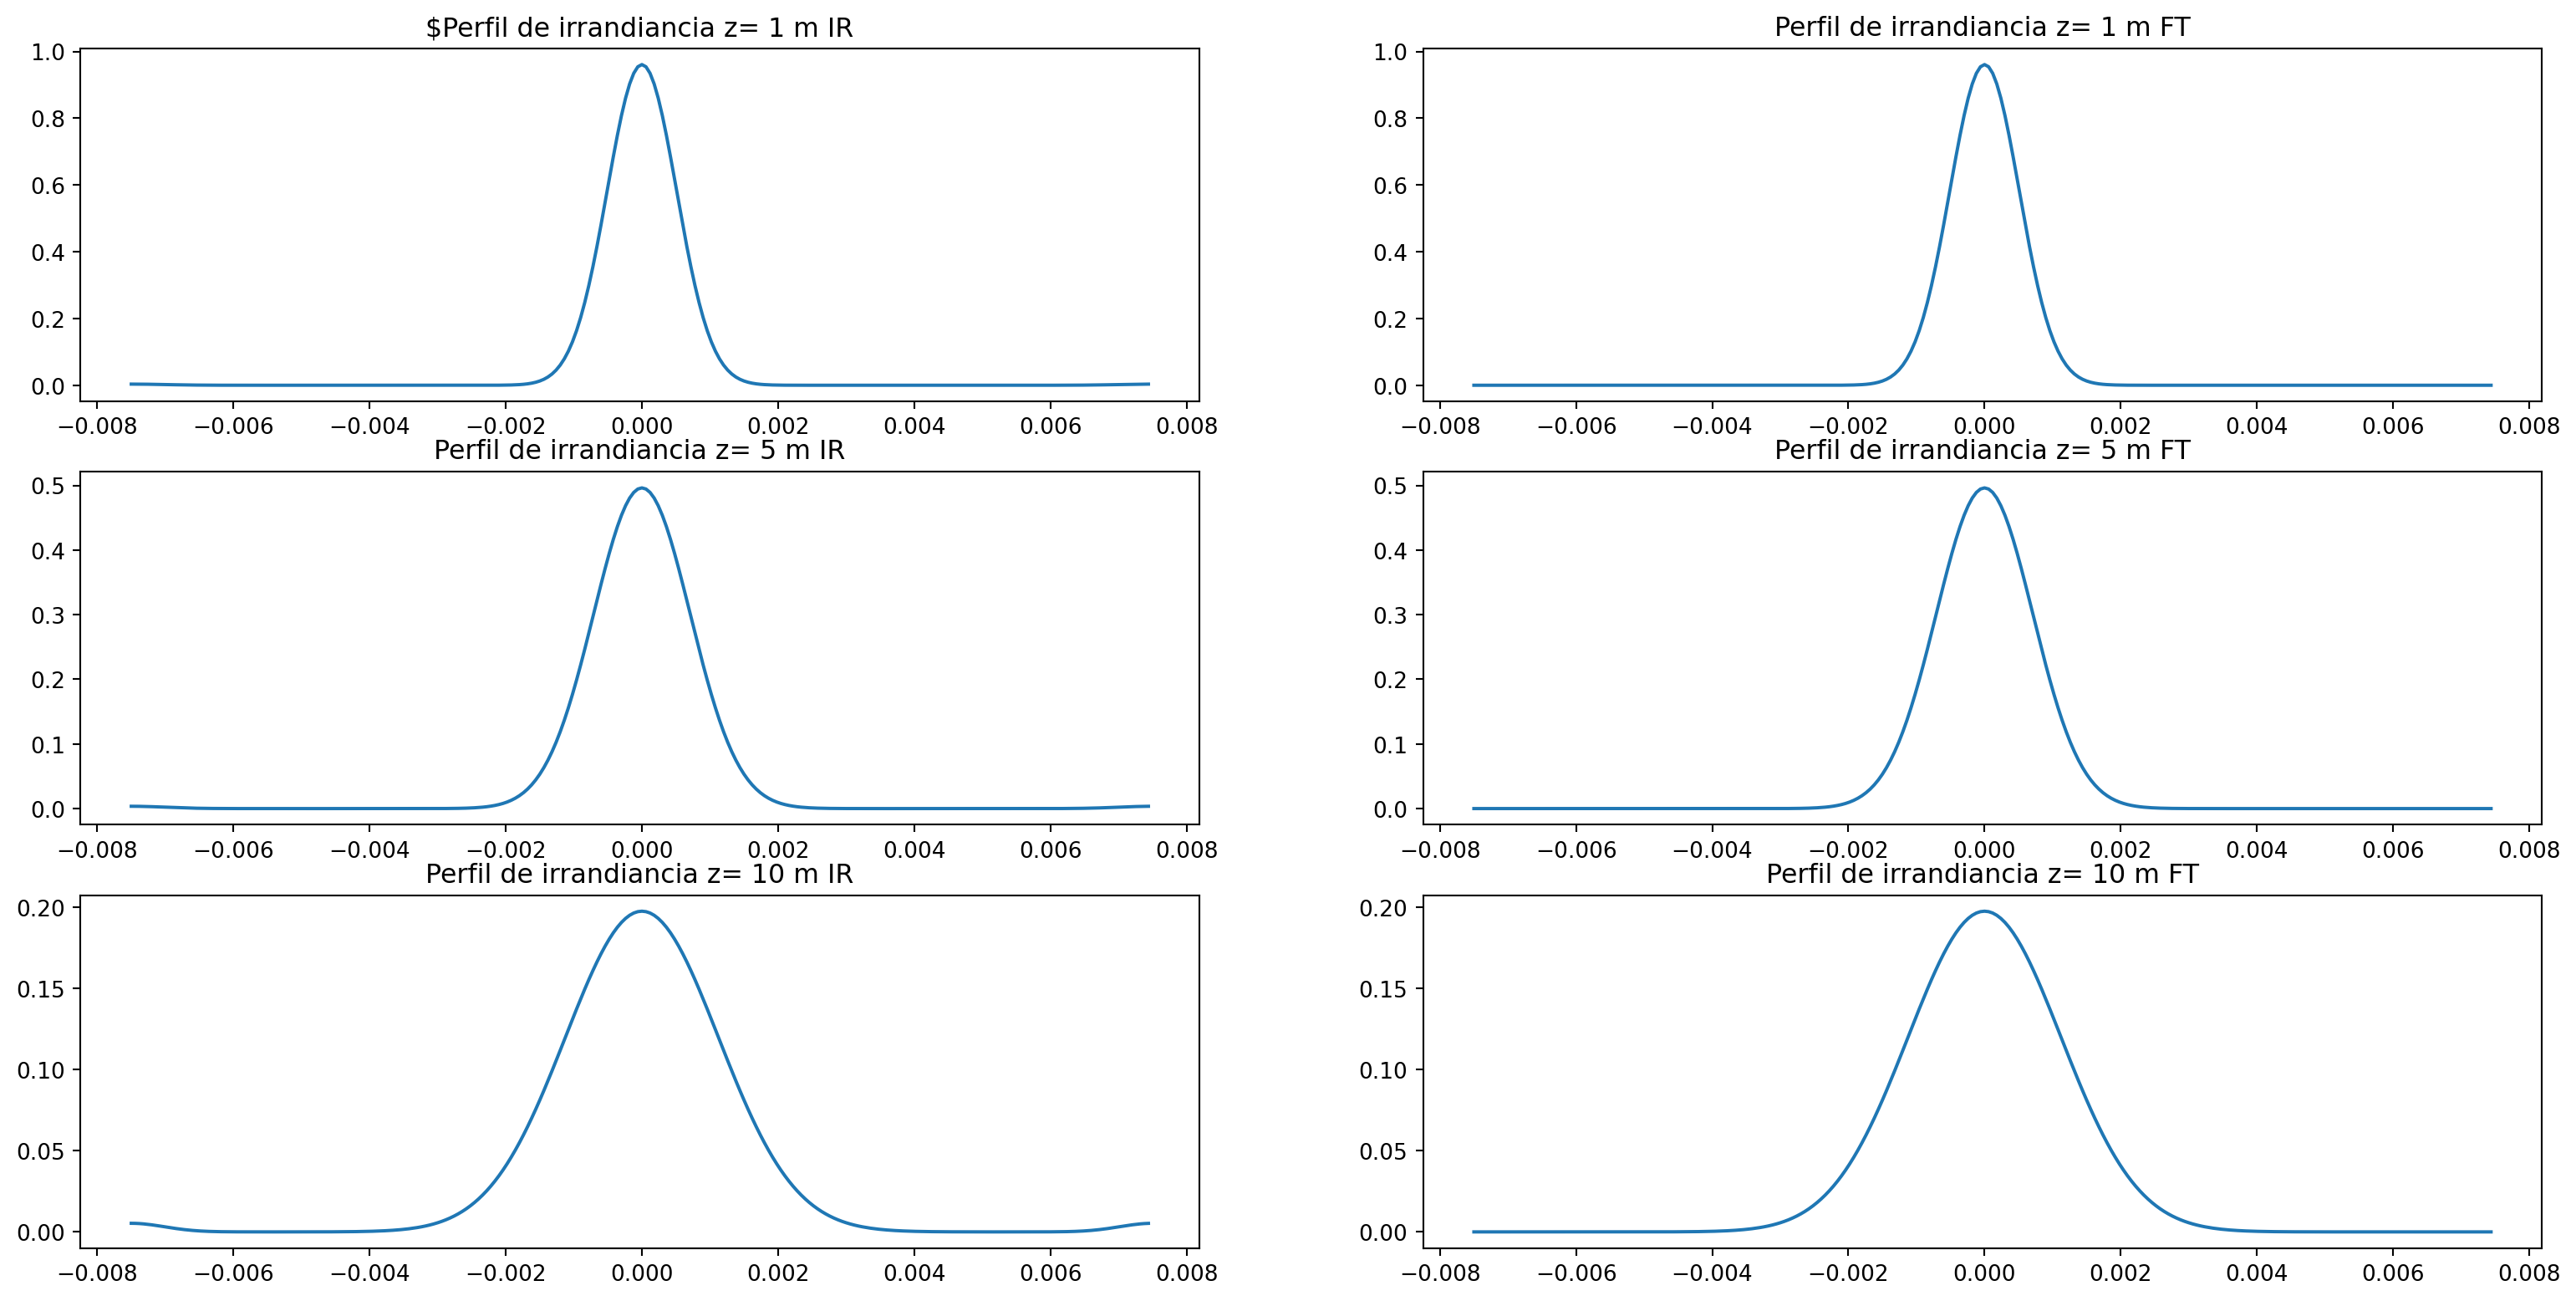

In [ ]:
plt.rcParams['figure.figsize'] = 20,10
fig = plt.figure(dpi=190)

ax = fig.add_subplot(3, 2, 1)
ax.plot(xg,np.abs(u2irz1)[125,:]**(2))
ax.title.set_text('$Perfil de irrandiancia z= 1 m IR')
ax = fig.add_subplot(3, 2,2)
ax.plot(xg,np.abs(u2ftz1)[125,:]**(2))
ax.title.set_text('Perfil de irrandiancia z= 1 m FT')
ax = fig.add_subplot(3, 2, 3)
ax.plot(xg,np.abs(u2irz2)[125,:]**(2))
ax.title.set_text('Perfil de irrandiancia z= 5 m IR')
ax = fig.add_subplot(3, 2,4)
ax.plot(xg,np.abs(u2ftz2)[125,:]**(2))
ax.title.set_text('Perfil de irrandiancia z= 5 m FT')
ax = fig.add_subplot(3, 2, 5)
ax.plot(xg,np.abs(u2irz3)[125,:]**(2))
ax.title.set_text('Perfil de irrandiancia z= 10 m IR')
ax = fig.add_subplot(3, 2,6)
ax.plot(xg,np.abs(u2ftz3)[125,:]**(2))
ax.title.set_text('Perfil de irrandiancia z= 10 m FT')

Implementemos la forma analitica
$$I(x,y,z) = I_0(\frac{w_0}{w(z)})^2 exp[-2\frac{x^2 + y^2}{w^2(z)}]$$
Donde: 
$$w(z) = w_0 \sqrt{1 + (\frac{z}{z_R})^2}$$
con: $z_R = \pi w_0^2/\lambda$ y $I_0 = \frac{|A_0|^2}{2\eta}$. 

In [ ]:
Ao=1.
eta=377.
zr = zr=(np.pi*wo**2)/wl
def I(x,y,z): #Función de irradiancia dada por el texto ec 5.26
    wz=wo*np.sqrt(1+(z/zr)**2)
    return ((wo/wz)**2)*np.exp(-2*(x**2+y**2)/wz**2)

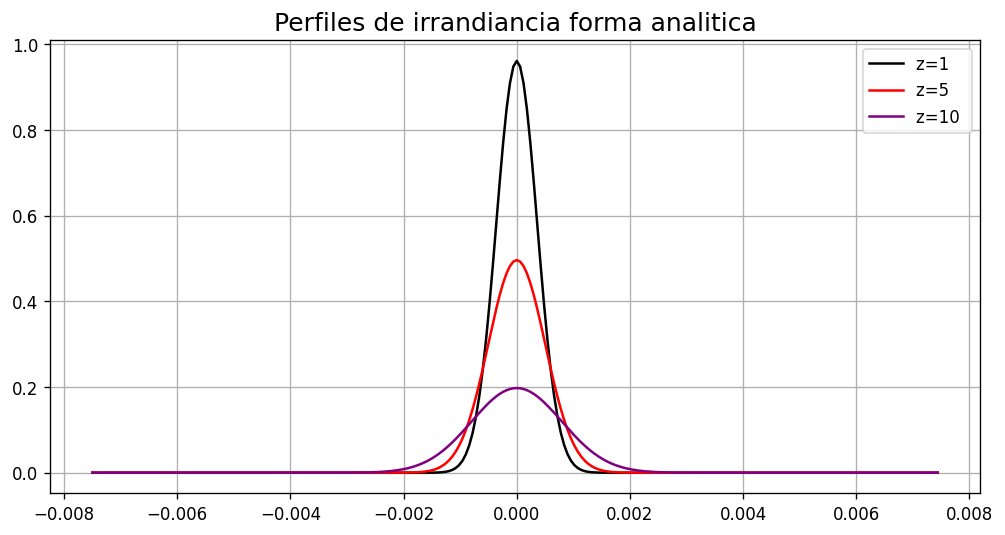

In [ ]:
Ig1 = I(xg,yg,z1)
Ig2 = I(xg,yg,z2)
Ig3 = I(xg,yg,z3)

plt.figure(dpi=120)
plt.title('Perfiles de irrandiancia forma analitica', fontsize=15)
plt.plot(xg, Ig1,color='black', label='z=1 ')
plt.plot(xg, Ig2,color='red', label='z=5 ')
plt.plot(xg, Ig3,color='purple', label='z=10 ')
plt.legend()
plt.grid()

Comparando podemos ver que los perfiles son idénticos quitando el factor $I_o$ ya que este no lo obtuvimos en la forma analitica demostrada y solo sería una normalización. 